In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# 1. Carregar os dados
file_path = "C:/Users/afili/Desktop/Uni/Mestrado/AASE/apartments_for_rent_100k_final.csv" 
data = pd.read_csv(file_path, sep=';')

In [109]:
data['price_class'] = pd.cut(data['price'], bins=[-float('inf'), data['price'].median(), float('inf')], labels=['A', 'B'])

In [110]:
features = [
    'bathrooms', 'bedrooms', 'pets_allowed_transformed', 'cityname_transformed',
    'has_photo_transformed', 'square_feet', 'AC', 'Alarm', 'Basketball',
    'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator',
    'Fireplace', 'Garbage Disposal', 'Gated', 'Golf', 'Gym', 'Hot Tub',
    'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Playground',
    'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer',
    'Wood Floors'
]

X = data[features]
X = pd.get_dummies(X, drop_first=True)
y = data['price_class']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [113]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [114]:
best_model = grid_search.best_estimator_

In [115]:

y_pred = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred)
optimized_precision = precision_score(y_test, y_pred, average='weighted')

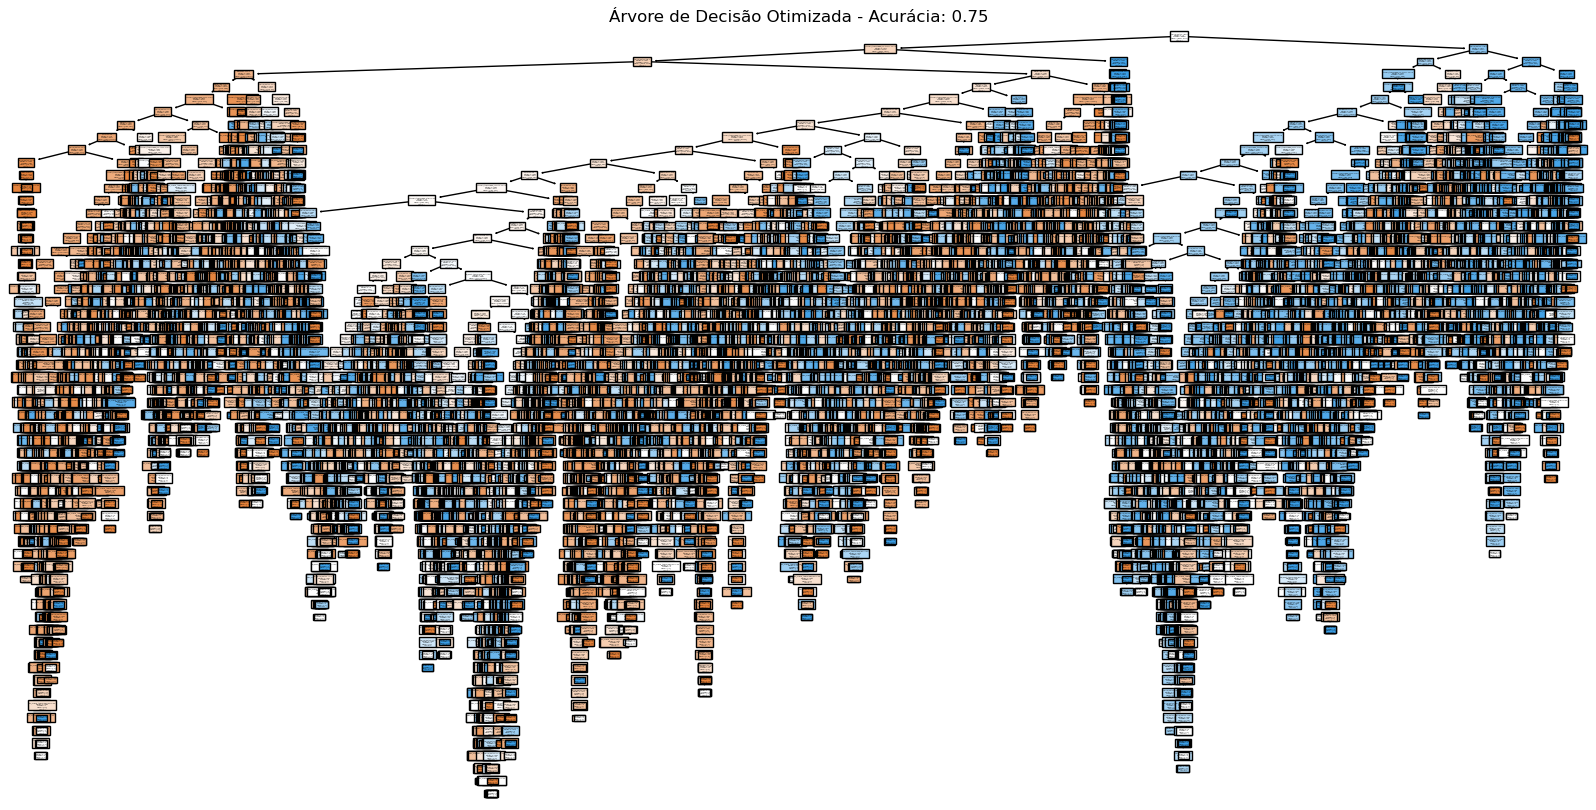

In [116]:

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=best_model.classes_, filled=True)
plt.title(f"Árvore de Decisão Otimizada - Acurácia: {optimized_accuracy:.2f}")
plt.show()


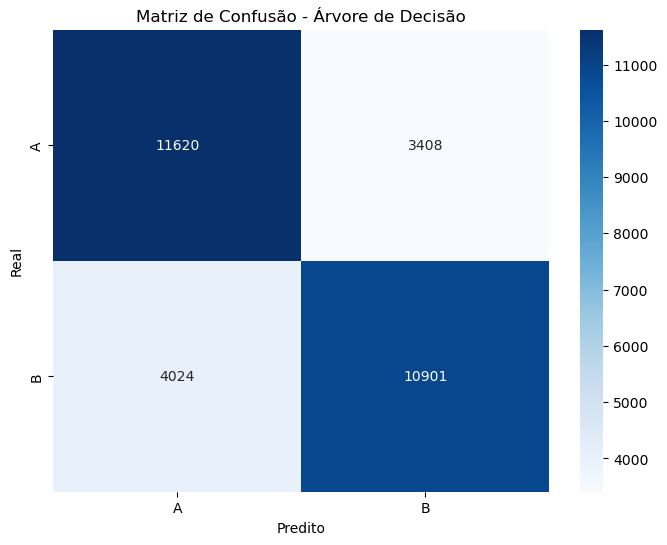

In [117]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

In [118]:
importances = best_model.feature_importances_
print("\nImportância das Features:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


Importância das Features:
bathrooms: 0.0248
bedrooms: 0.0284
square_feet: 0.4080
AC: 0.0219
Alarm: 0.0012
Basketball: 0.0093
Cable or Satellite: 0.0141
Clubhouse: 0.0233
Dishwasher: 0.0163
Doorman: 0.0010
Elevator: 0.0105
Fireplace: 0.0248
Garbage Disposal: 0.0044
Gated: 0.0179
Golf: 0.0000
Gym: 0.0275
Hot Tub: 0.0084
Internet Access: 0.0157
Luxury: 0.0013
Parking: 0.0313
Patio/Deck: 0.0333
Playground: 0.0133
Pool: 0.0302
Refrigerator: 0.0135
Storage: 0.0316
TV: 0.0108
Tennis: 0.0150
View: 0.0068
Washer Dryer: 0.0192
Wood Floors: 0.0144
pets_allowed_transformed_Yes: 0.0408
cityname_transformed_Atlanta: 0.0033
cityname_transformed_Charlotte: 0.0037
cityname_transformed_Dallas: 0.0058
cityname_transformed_Denver: 0.0083
cityname_transformed_Las Vegas: 0.0053
cityname_transformed_Los Angeles: 0.0249
cityname_transformed_Other: 0.0111
has_photo_transformed_Yes: 0.0187


In [119]:
print("Acurácia da Árvore de Decisão:", optimized_accuracy)
print("Precisão da Árvore de Decisão:", optimized_precision)
print("\nRelatório de Classificação - Árvore de Decisão:\n", classification_report(y_test, y_pred))

Acurácia da Árvore de Decisão: 0.7518779421093046
Precisão da Árvore de Decisão: 0.752269745432082

Relatório de Classificação - Árvore de Decisão:
               precision    recall  f1-score   support

           A       0.74      0.77      0.76     15028
           B       0.76      0.73      0.75     14925

    accuracy                           0.75     29953
   macro avg       0.75      0.75      0.75     29953
weighted avg       0.75      0.75      0.75     29953



In [120]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Camadas ocultas: 50 e 25 neurônios
    activation='relu',           # Função de ativação ReLU
    solver='adam',               # Otimizador Adam
    max_iter=500,                # Máximo de iterações
    random_state=42
)

In [121]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)

In [122]:
y_pred_mlp = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp, average='weighted')

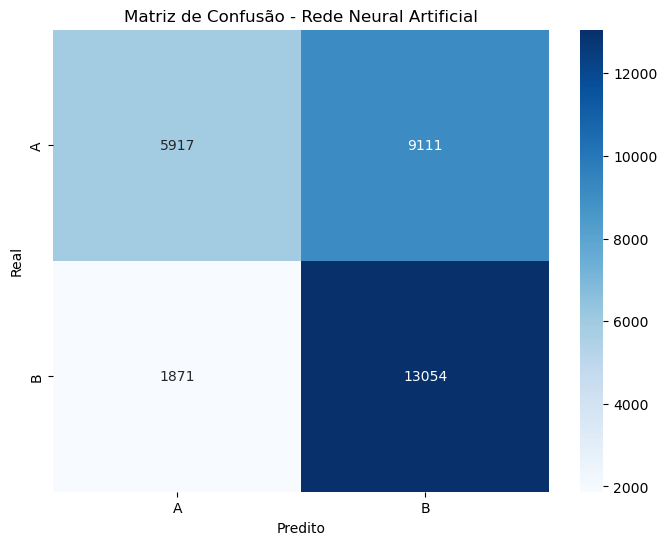

In [123]:
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Rede Neural Artificial")
plt.show()

In [124]:
print("Acurácia da Rede Neural Artificial:", mlp_accuracy)
print("Precisão da Rede Neural Artificial:", mlp_precision)
print("\nRelatório de Classificação - Rede Neural Artificial:\n", classification_report(y_test, y_pred_mlp))

Acurácia da Rede Neural Artificial: 0.633358928988749
Precisão da Rede Neural Artificial: 0.6746462576460464

Relatório de Classificação - Rede Neural Artificial:
               precision    recall  f1-score   support

           A       0.76      0.39      0.52     15028
           B       0.59      0.87      0.70     14925

    accuracy                           0.63     29953
   macro avg       0.67      0.63      0.61     29953
weighted avg       0.67      0.63      0.61     29953



In [126]:
rf = RandomForestClassifier(
    n_estimators=100,            # 100 árvores
    max_depth=None,              # Sem limite de profundidade
    random_state=42,             # Reprodutibilidade
    class_weight='balanced'      # Balancear classes
)

In [127]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [128]:
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')

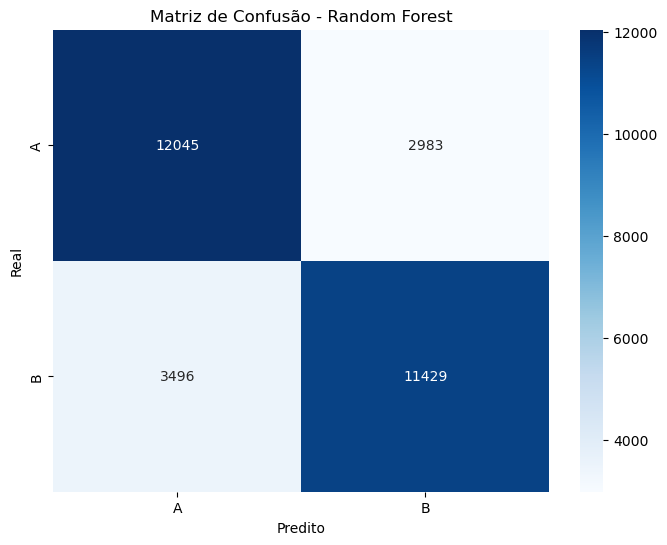

In [129]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [130]:
print("Acurácia do Random Forest:", rf_accuracy)
print("Precisão do Random Forest:", rf_precision)
print("\nRelatório de Classificação - Random Forest:\n", classification_report(y_test, y_pred_rf))

Acurácia do Random Forest: 0.7836944546456115
Precisão do Random Forest: 0.7840022761398894

Relatório de Classificação - Random Forest:
               precision    recall  f1-score   support

           A       0.78      0.80      0.79     15028
           B       0.79      0.77      0.78     14925

    accuracy                           0.78     29953
   macro avg       0.78      0.78      0.78     29953
weighted avg       0.78      0.78      0.78     29953



In [131]:
print("\nComparação de Modelos:")
print(f"Árvore de Decisão - Acurácia: {optimized_accuracy:.2f}, Precisão: {optimized_precision:.2f}")
print(f"Rede Neural Artificial - Acurácia: {mlp_accuracy:.2f}, Precisão: {mlp_precision:.2f}")
print(f"Random Forest - Acurácia: {rf_accuracy:.2f}, Precisão: {rf_precision:.2f}")


Comparação de Modelos:
Árvore de Decisão - Acurácia: 0.75, Precisão: 0.75
Rede Neural Artificial - Acurácia: 0.63, Precisão: 0.67
Random Forest - Acurácia: 0.78, Precisão: 0.78
